<a href="https://colab.research.google.com/github/junior825/BERT/blob/main/Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parkyongchan","key":"3a4d692af68deb0ef0e7c9f388541a58"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         92           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        101           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        933           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        159           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1848           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14098           False  
house-pr

In [4]:
!kaggle competitions download -c nlp-getting-started

!kaggle competitions files -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 62.6MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.4MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 62.9MB/s]
name                    size  creationDate         
---------------------  -----  -------------------  
test.csv               411KB  2019-12-16 20:36:20  
train.csv              965KB  2019-12-16 20:36:20  
sample_submission.csv   22KB  2019-12-16 20:36:20  


In [5]:
import pandas as pd

test = pd.DataFrame(pd.read_csv('./test.csv')) # test feature
submission = pd.DataFrame(pd.read_csv('./sample_submission.csv')) # Prediction
train = pd.DataFrame(pd.read_csv('./train.csv')) # train_tata => feature / target

train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
print(train.isnull().sum())
print(len(train))
print(train.columns)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
7613
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [7]:
train_data = train.drop(['id','keyword','location'], axis=1)

train_data

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [8]:
print(train_data.groupby('target').size())

target
0    4342
1    3271
dtype: int64


In [9]:
import re

print(train_data['text'])
def clean_text(inputString):
  text_rmv = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!·]', ' ', inputString) 
  text_rmv = ' '.join(text_rmv.split())
  return text_rmv

train_text_feature = [clean_text(str(s)) for s in train_data['text']]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object


In [10]:
from sklearn.model_selection import train_test_split

train_feature, val_feature, train_target, val_target = train_test_split(train_text_feature, train_data['target'], train_size = 0.8, random_state = 40)

print(train_feature[0])

flood disaster Heavy rain causes flash flooding of streets in Manitou Colorado Springs areas


In [11]:
!pip install transformers
from transformers import BertTokenizerFast, TFBertModel

BERT_MODEL = 'bert-base-uncased'

tokenizer = BertTokenizerFast.from_pretrained(BERT_MODEL)

train_tokenizer = tokenizer(train_feature, return_tensors='tf', truncation = True, padding = True)
val_tokenizer = tokenizer(val_feature, return_tensors='tf', truncation = True, padding = True)

     |████████████████████████████████| 3.4 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 40.2 MB/s 
     |████████████████████████████████| 61 kB 489 kB/s 
     |████████████████████████████████| 895 kB 44.7 MB/s 
     |████████████████████████████████| 3.3 MB 24.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [12]:
print(train_tokenizer[0].tokens)

['[CLS]', 'flood', 'disaster', 'heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'mani', '##tou', 'colorado', 'springs', 'areas', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [13]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
  train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_tokenizer),
    train_target
    ))
  
  val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_tokenizer),
    val_target
    ))

In [14]:
print(train_dataset)

<TensorSliceDataset shapes: ({input_ids: (59,), token_type_ids: (59,), attention_mask: (59,)}, ()), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int64)>


In [15]:
from transformers import BertTokenizer, TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained(BERT_MODEL, num_labels=2, from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer = optimizer, loss = model.compute_loss, metrics=['accuracy']) # loss를 변경하니까 accuracy가 확실하게 올라간다...? 이게 무슨일인가? model.comput_loss는 tensorflow 전용으로 사용되는 loss로써 test와 train을 step마다 변화시켜준다.(이론은 들여다봐야할듯)

with tf.device('/device:GPU:0'): # device에 있는 GPU:0를 사용하겠다.
  history = model.fit(
    train_dataset.shuffle(1000).batch(16), 
    validation_data = val_dataset.shuffle(1000).batch(16),
    epochs = 5, batch_size= 16
    )

# 내일 공부할 분야 : model.fit이 나올 때마다 loss / accuracy / val_loss 등의 데이터가 나올 수 있도록 작성하는 것

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
381/381 [==============================] - 222s 463ms/step - loss: 0.4451 - accuracy: 0.8092 - val_loss: 0.3944 - val_accuracy: 0.8332
Epoch 2/5
381/381 [==============================] - 168s 440ms/step - loss: 0.3197 - accuracy: 0.8731 - val_loss: 0.3951 - val_accuracy: 0.8437
Epoch 3/5
381/381 [==============================] - 167s 438ms/step - loss: 0.2069 - accuracy: 0.9250 - val_loss: 0.5169 - val_accuracy: 0.8299
Epoch 4/5
381/381 [==============================] - 167s 437ms/step - loss: 0.1410 - accuracy: 0.9496 - val_loss: 0.7129 - val_accuracy: 0.8194
Epoch 5/5
381/381 [==============================] - 167s 438ms/step - loss: 0.0905 - accuracy: 0.9680 - val_loss: 0.7045 - val_accuracy: 0.8404


In [16]:
print(history.history)

{'loss': [0.4451111853122711, 0.319652795791626, 0.20694564282894135, 0.14095823466777802, 0.09051990509033203], 'accuracy': [0.8091953992843628, 0.8730705976486206, 0.9249589443206787, 0.9495894908905029, 0.9679803252220154], 'val_loss': [0.39443525671958923, 0.3950745463371277, 0.5169090032577515, 0.7128987908363342, 0.7044915556907654], 'val_accuracy': [0.8332238793373108, 0.8437294960021973, 0.829940915107727, 0.8194352984428406, 0.8404464721679688]}


No handles with labels found to put in legend.


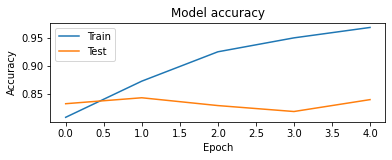

No handles with labels found to put in legend.


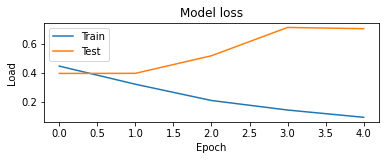

In [20]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Load')
plt.legend()
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

In [ ]:
import os
MODEL_NAME = 'My-bert-base'
MODEL_SAVE_PATH = os.path.join("_model", MODEL_NAME) # change this to your preferred location

if os.path.exists(MODEL_SAVE_PATH):
    print(f"{MODEL_SAVE_PATH} -- Folder already exists \n")
else:
    os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
    print(f"{MODEL_SAVE_PATH} -- Folder create complete \n")

# save tokenizer, model
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

In [ ]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
loaded_tokenizer = BertTokenizerFast.from_pretrained(MODEL_SAVE_PATH)
loaded_model = TFBertForSequenceClassification.from_pretrained(MODEL_SAVE_PATH)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

In [ ]:
test['real'] = submission['target']

test

In [ ]:
predicted_label_list = []
predicted_score_list = []

for text in test['text']:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    predicted_label_list.append(sorted_preds_list[0]) # label
    predicted_score_list.append(sorted_preds_list[1]) # score

test['pred'] = predicted_label_list
test['score'] = predicted_score_list
test.head()

#result_data = pd.DataFrame({'text' : test['text'], 'target' : submission['target'], 'predict' : predict})